In [2]:
import myTools
import qTools
import qPlots
import myQiskit
import numpy as np
import matplotlib.pyplot as plt
from myTools import around

startTime = myTools.strtime()
myJobs = []
print(f"Start at {startTime}\n")
qVersion=qTools.init_qnotebook(output=True)

import qiskit.tools.jupyter
%qiskit_version_table

Start at Tue Jan 24 14:38:14 2023 UTC

Python: sys.version_info(major=3, minor=10, micro=6, releaselevel='final', serial=0)
myTools: myTools(major=1, minor=2, micro=0)

jTools: jTools(major=1, minor=0, micro=3)
Virtual Env /home/richard/jupyter/qis-rel
Working Dir: /home/richard/src/qiskit-notebooks/Qiskit-Challenges/open-science-prize-2022
qTools: qTools(major=1, minor=1, micro=0)
Qiskit: <dict>
    qiskit-terra : 0.22.4
    qiskit-aer : 0.11.2
    qiskit-ignis : 0.7.1
    qiskit-ibmq-provider : 0.19.2
    qiskit : 0.39.5
    qiskit-nature : 0.5.2
    qiskit-finance : 0.3.4
    qiskit-optimization : 0.4.0
    qiskit-machine-learning : None



XZ =  Matrix([[0, -1], [1, 0]]) 

RX = [[-1.0*I*sin(θ/2) cos(θ/2)]
 [cos(θ/2) -1.0*I*sin(θ/2)]]

RY = Matrix([[-1.0*sin(θ/2), 1.0*I*cos(θ/2)], [-1.0*I*cos(θ/2), 1.0*sin(θ/2)]])

RZ = Matrix([[cos(θ/2), 1.0*I*sin(θ/2)], [-1.0*I*sin(θ/2), -cos(θ/2)]])



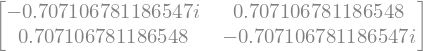

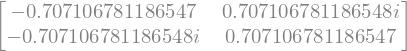

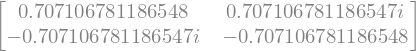

In [107]:
from sympy import Symbol, cos, sin, init_printing, Matrix
import sympy as sp
from qiskit.visualization import array_to_latex
import matplotlib
import jTools
jTools.cellOutputAll()
init_printing()

θ = Symbol('θ')
X = Matrix([[0,1],[1,0]])
Y = Matrix([[0,1j],[-1j,0]])
Z = Matrix([[1,0],[0,-1]])

R = Matrix([[cos(θ/2), -1j*sin(θ/2)], [-1j*sin(θ/2), cos(θ/2)]])
XZ = X * Z
XY = X @ Y
YZ = X @ Z
RX = R * X
RY = R * Y
RZ = R * Z

print("XZ = ",XZ,"\n")
print(f"RX = {np.array(RX)}\n")
print(f"RY = {RY}\n")
print(f"RZ = {RZ}\n")

RXP=RX.subs(θ,np.pi/2)
RYP=RY.subs(θ,np.pi/2)
RZP=RZ.subs(θ,np.pi/2)
RXP
RYP
RZP



In [115]:
from qiskit.opflow import X, Y, Z, I
H0 = 5.9*(I^I^I) + 0.21*(Z^I^I) - 6.12*(I^Z^I) - 2.14*(X^X^I) - 2.14*(Y^Y^I) + 9.6*(I^I^I) - 9.6*(I^I^Z) - 3.9*(I^X^X) - 3.9*(I^Y^Y)
H1 = 5.9*(I^I^I) + 0.21*(Z^I^I) - 6.12*(I^Z^I) - 2.14*(X^X^I) - 2.14*(Y^Y^I)
H1 += 9.6*(I^I^I) - 9.6*(I^I^Z) - 3.9*(I^X^X) - 3.9*(I^Y^Y)

from qiskit.visualization.array import array_to_latex
H0_matrix = H0.to_matrix()
array_to_latex(H0_matrix)


H1_matrix = H1.to_matrix()
array_to_latex(H1_matrix)

H1

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

PauliSumOp(SparsePauliOp(['III', 'ZII', 'IZI', 'XXI', 'YYI', 'III', 'IIZ', 'IXX', 'IYY'],
              coeffs=[ 5.9 +0.j,  0.21+0.j, -6.12+0.j, -2.14+0.j, -2.14+0.j,  9.6 +0.j,
 -9.6 +0.j, -3.9 +0.j, -3.9 +0.j]), coeff=1)

In [ ]:
array_to_latex(XZ)
from qStats import backend_calibrations
bendName = 'ibm_nairobi'
calibs = backend_calibrations(bendName)
qbit_freqs, pi_amps, pi2_amps = calibs['calib_freqs'], calibs['pi_amps'], calibs['pi2_amps']

provider = qTools.get_provider(output=False)
backend  = provider.get_backend(bendName)
backend_desc, image = myQiskit.backend_description(backend,output=True)
image